In [48]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import numpy as np

from src.hopfield_network import HopfieldNetwork, _predict_batch, _predict_sequential, _get_energy

# 3.0

In [49]:
x1=np.array([-1,-1,1,-1,1,-1,-1,1],dtype=float)
x2=np.array([-1,-1,-1,-1,-1,1,-1,-1],dtype=float)
x3=np.array([-1,1,1,-1,-1,1,-1,1],dtype=float)

In [50]:
patterns=np.array([x1,x2,x3])

In [51]:
print(patterns)

[[-1. -1.  1. -1.  1. -1. -1.  1.]
 [-1. -1. -1. -1. -1.  1. -1. -1.]
 [-1.  1.  1. -1. -1.  1. -1.  1.]]


In [52]:
network = HopfieldNetwork(max_iterations = 1)

In [53]:
network.fit(patterns, patterns)

results = network.predict(patterns)

for x in range(len(patterns)):
  print("Old pattern was ", patterns [x]," updated pattern is ", results[x])
  if (np.array_equal(patterns [x],results[x])):
    print("Patterns are equal.")

Old pattern was  [-1. -1.  1. -1.  1. -1. -1.  1.]  updated pattern is  [-1 -1  1 -1  1 -1 -1  1]
Patterns are equal.
Old pattern was  [-1. -1. -1. -1. -1.  1. -1. -1.]  updated pattern is  [-1 -1 -1 -1 -1  1 -1 -1]
Patterns are equal.
Old pattern was  [-1.  1.  1. -1. -1.  1. -1.  1.]  updated pattern is  [-1  1  1 -1 -1  1 -1  1]
Patterns are equal.


## 3.1 Convergence and attractors
Can the memory recall the stored patterns from distorted inputs patterns? Define a few new patterns which are distorted versions of the original ones:

x1d=[ 1 -1 1 -1 1 -1 -1 1]

x2d=[ 1 1 -1 -1 -1 1 -1 -1]

x3d=[ 1 1 1 -1 1 1 -1 1]

x1d has a one bit error, x2d and x3d have two bit errors.

#### Apply the update rule repeatedly until you reach a stable fixed point. Did all the patterns converge towards stored patterns?

In [54]:
x1d=np.array([1,-1,1,-1,1,-1,-1,1])
x2d=np.array([1,1,-1,-1,-1,1,-1,-1])
x3d=np.array([1,1,1,-1,1,1,-1,1])

In [55]:
patterns_d = patterns_distorded=np.array([x1d,x2d,x3d])

In [56]:
network = HopfieldNetwork()

In [57]:
network.fit(patterns, patterns)

results = network.predict(patterns_d)

for x in range(len(patterns)):
  print("The input patterns is ", patterns_d[x]," , the correct pattern was ", patterns[x], " and the resulting pattern is", results[x])
  if (np.array_equal(patterns[x], results[x])):
    print("Resulting and old patterns are equal.")
  else:
        print("Resulting and old patterns are not equal.")

The input patterns is  [ 1 -1  1 -1  1 -1 -1  1]  , the correct pattern was  [-1. -1.  1. -1.  1. -1. -1.  1.]  and the resulting pattern is [-1 -1  1 -1  1 -1 -1  1]
Resulting and old patterns are equal.
The input patterns is  [ 1  1 -1 -1 -1  1 -1 -1]  , the correct pattern was  [-1. -1. -1. -1. -1.  1. -1. -1.]  and the resulting pattern is [-1 -1 -1 -1 -1  1 -1 -1]
Resulting and old patterns are equal.
The input patterns is  [ 1  1  1 -1  1  1 -1  1]  , the correct pattern was  [-1.  1.  1. -1. -1.  1. -1.  1.]  and the resulting pattern is [-1  1  1 -1 -1  1 -1  1]
Resulting and old patterns are equal.


All distorted patterns are updated back to the original ones.

In [58]:
network = HopfieldNetwork(max_iterations = 3, prediction_method = "sequential")

In [59]:
network.fit(patterns, patterns)

results = network.predict(patterns_d)

for x in range(len(patterns)):
  print("The input patterns is ", patterns_d[x]," , the correct pattern was ", patterns[x], " and the resulting pattern is", results[x])
  if (np.array_equal(patterns[x], results[x])):
    print("Resulting and old patterns are equal.")
  else:
        print("Resulting and old patterns are not equal.")

The input patterns is  [ 1 -1  1 -1  1 -1 -1  1]  , the correct pattern was  [-1. -1.  1. -1.  1. -1. -1.  1.]  and the resulting pattern is [-1 -1  1 -1  1 -1 -1  1]
Resulting and old patterns are equal.
The input patterns is  [ 1  1 -1 -1 -1  1 -1 -1]  , the correct pattern was  [-1. -1. -1. -1. -1.  1. -1. -1.]  and the resulting pattern is [-1 -1 -1 -1 -1  1 -1 -1]
Resulting and old patterns are equal.
The input patterns is  [ 1  1  1 -1  1  1 -1  1]  , the correct pattern was  [-1.  1.  1. -1. -1.  1. -1.  1.]  and the resulting pattern is [-1 -1  1 -1  1 -1 -1  1]
Resulting and old patterns are not equal.


#### How many attractors are there in this network?

In [60]:
# Creation of the set of all combinations of patterns

all_patterns = np.array([np.array(i) for i in itertools.product([-1, 1], repeat=8)])

In [61]:
# For each combination, find the fixed point
network = HopfieldNetwork(max_iterations = 3, prediction_method = "sequential")

network.fit(patterns, patterns)

results = network.predict(all_patterns)

In [62]:
print("The number of attractors in this network is ", len(np.unique(results, axis=0)))

The number of attractors in this network is  14


In [63]:
attractors = np.unique(results, axis=0)
occurences = np.zeros(len(attractors))
index = 0
for attractor in attractors:
    for i in range(len(results)):
        if np.array_equal(attractor, results[i]):
            occurences[index]+=1
    index+=1
print("The number of attractors in this network is ", len(attractors))

The number of attractors in this network is  14


In [64]:
attractors

array([[-1, -1, -1, -1, -1,  1, -1, -1],
       [-1, -1, -1, -1,  1, -1, -1, -1],
       [-1, -1,  1, -1, -1, -1, -1,  1],
       [-1, -1,  1, -1, -1,  1, -1,  1],
       [-1, -1,  1, -1,  1, -1, -1,  1],
       [-1,  1,  1, -1, -1,  1, -1,  1],
       [ 1, -1, -1,  1, -1,  1,  1, -1],
       [ 1, -1, -1,  1,  1, -1,  1, -1],
       [ 1, -1,  1,  1,  1, -1,  1,  1],
       [ 1,  1, -1,  1, -1, -1,  1, -1],
       [ 1,  1, -1,  1, -1,  1,  1, -1],
       [ 1,  1, -1,  1,  1, -1,  1, -1],
       [ 1,  1,  1,  1, -1,  1,  1,  1],
       [ 1,  1,  1,  1,  1, -1,  1,  1]])

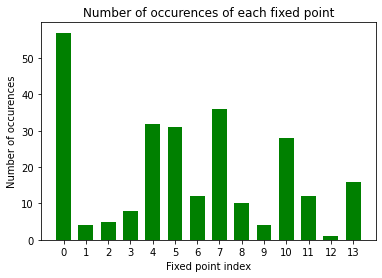

In [111]:
plt.xticks(np.arange(len(attractors)))
width = 1/1.5
plt.bar(range(len(attractors)), occurences, width, color="green")
plt.xlabel("Fixed point index")
plt.ylabel("Number of occurences")
plt.title("Number of occurences of each fixed point")
plt.show()

#### What happens when you make the starting pattern even more dissimilar to the stored ones (e.g. more than half is wrong)?

In [66]:
# These three input patterns have 5 bit errors, compared with x1, x2 and x3

x1d2=np.array([1,1,-1,1,-1,-1,-1,1])
x2d2=np.array([1,1,1,1,1,1,-1,-1])
x3d2=np.array([1,-1,-1,1,1,1,-1,1])

In [67]:
patterns_d2=np.array([x1d2, x2d2, x3d2])

In [68]:
network = HopfieldNetwork()

In [69]:
network.fit(patterns, patterns)

results = network.predict(patterns_d2)

for x in range(len(patterns)):
  print("The input patterns is ", patterns_d2[x]," , the correct pattern was ", patterns[x], " and the resulting pattern is", results[x])
  if (np.array_equal(patterns[x], results[x])):
    print("Resulting and old patterns are equal.")
  else:
        print("Resulting and old patterns are not equal.")

The input patterns is  [ 1  1 -1  1 -1 -1 -1  1]  , the correct pattern was  [-1. -1.  1. -1.  1. -1. -1.  1.]  and the resulting pattern is [ 1  1 -1  1 -1 -1  1 -1]
Resulting and old patterns are not equal.
The input patterns is  [ 1  1  1  1  1  1 -1 -1]  , the correct pattern was  [-1. -1. -1. -1. -1.  1. -1. -1.]  and the resulting pattern is [ 1  1 -1  1 -1 -1  1 -1]
Resulting and old patterns are not equal.
The input patterns is  [ 1 -1 -1  1  1  1 -1  1]  , the correct pattern was  [-1.  1.  1. -1. -1.  1. -1.  1.]  and the resulting pattern is [ 1 -1 -1  1  1 -1  1 -1]
Resulting and old patterns are not equal.


It seems that if the input patterns are very dissimilar, the memory cannot recall the stored patterns

# 3.2  Sequential Update
So far we have only used a very small 8-neuron network. Now we will switch
to a 1024-neuron network and picture patterns. Load the file pict.dat, which
contains nine 1024-dim patterns stored one after another.

In [70]:
data = np.genfromtxt('./data/pict.dat', dtype = None, delimiter = ',',encoding=None)

In [71]:
# this function separate all the data in 11 patterns of size 1024

def separate(data):
  patterns=[]
  L=[]
  for i in range(len(data)):
    if i%1024==0 and i!=0:
      patterns.append(np.array(L))
      L=[]
    L.append(data[i])
  patterns.append(np.array(L))
  return patterns

In [72]:
patterns = separate(data)

In [73]:
p1=patterns[0]
p2=patterns[1]
p3=patterns[2]
p4=patterns[3]
p5=patterns[4]
p6=patterns[5]
p7=patterns[6]
p8=patterns[7]
p9=patterns[8]
p10=patterns[9]
p11=patterns[10]

Since large patterns are hard to read as rows of numbers, please display these
1024-dim patterns as a 32 × 32 image.

In [74]:
# this function displays each pattern as a 32x32 image

def display_pattern(pattern):
  pattern=pattern.reshape(32,32)
  plt.imshow(pattern, interpolation='nearest', cmap = "gray")
  if np.array_equal(pattern,p10.reshape(32,32)) or np.array_equal(pattern,p11.reshape(32,32)):
    plt.title("Degraded pattern")
  else:
    plt.title("Pattern")
  plt.show()

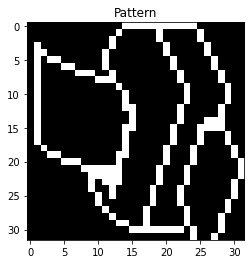

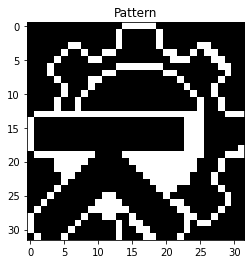

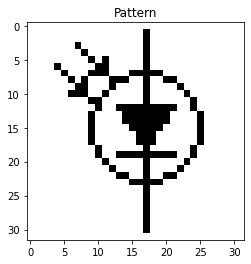

In [75]:
display_pattern(p1)
display_pattern(p2)
display_pattern(p3)

To start with, learn the first three.

In [76]:
training_patterns = np.array([p1,p2,p3])

#### Check that the three patterns are stable

In [113]:
network = HopfieldNetwork(max_iterations = 8, prediction_method = "sequential")

In [114]:
network.fit(training_patterns, training_patterns)

results = network.predict(training_patterns)

for x in range(len(training_patterns)):
  print("Old pattern was ", training_patterns[x]," updated pattern is ", results[x])
  if (np.array_equal(training_patterns[x],results[x])):
    print("Pattern is equal.")
  else:
        print("Pattern is not equal.")

Old pattern was  [-1 -1 -1 ... -1 -1 -1]  updated pattern is  [-1 -1 -1 ... -1 -1 -1]
Pattern is equal.
Old pattern was  [-1 -1 -1 ... -1 -1 -1]  updated pattern is  [-1 -1 -1 ... -1 -1 -1]
Pattern is equal.
Old pattern was  [1 1 1 ... 1 1 1]  updated pattern is  [1 1 1 ... 1 1 1]
Pattern is equal.


All three patterns are stable.

#### Can the network complete a degraded pattern? Try the pattern p10, which is a degraded version of p1, or p11 which is a mixture of p2 and p3.

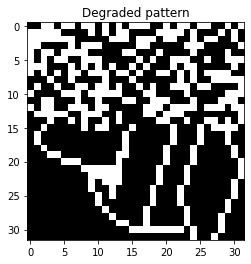

In [79]:
display_pattern(p10)

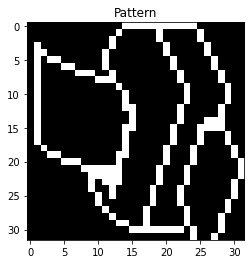

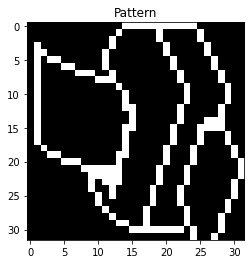

In [115]:
p10_result = network.predict(p10.reshape((1,1024)))

display_pattern(p1)
display_pattern(p10_result)
if (np.array_equal(p1, p10_result)):
    print("Patterns p1 and p10 are the same.")

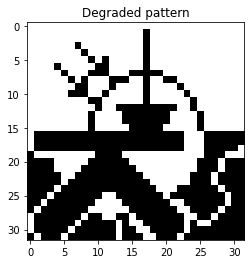

In [81]:
display_pattern(p11)

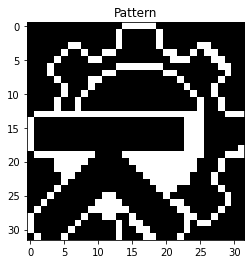

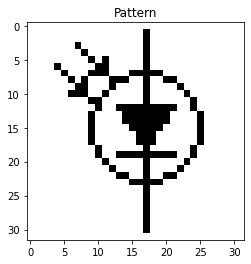

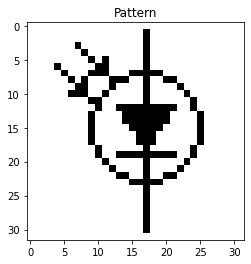

In [116]:
p11_result = network.predict(p11.reshape((1,1024)))

display_pattern(p2)
display_pattern(p3)
display_pattern(p11_result)

The network is able of reconstructing the pattern into another one, in this case p3.

#### Clearly convergence is practically instantaneous. What happens if we select units randomly? Please calculate their new state and then repeat the process in the spirit of the original sequential Hopfield dynamics. Please demonstrate the image every hundredth iteration or so.


In [83]:
network0 = HopfieldNetwork(max_iterations = 1, random_weights = True, prediction_method = "sequential")
network1 = HopfieldNetwork(max_iterations = 2, random_weights = True, prediction_method = "sequential")
network2 = HopfieldNetwork(max_iterations = 3, random_weights = True, prediction_method = "sequential")
network3 = HopfieldNetwork(max_iterations = 4, random_weights = True, prediction_method = "sequential")
network4 = HopfieldNetwork(max_iterations = 5, random_weights = True, prediction_method = "sequential")
network5 = HopfieldNetwork(max_iterations = 6, random_weights = True, prediction_method = "sequential")
network6 = HopfieldNetwork(max_iterations = 7, random_weights = True, prediction_method = "sequential")
network7 = HopfieldNetwork(max_iterations = 8, random_weights = True, prediction_method = "sequential")
network8 = HopfieldNetwork(max_iterations = 9, random_weights = True, prediction_method = "sequential")
network9 = HopfieldNetwork(max_iterations = 10, random_weights = True, prediction_method = "sequential")

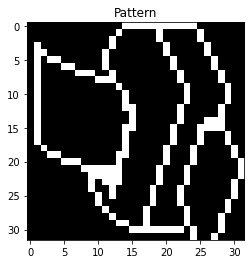

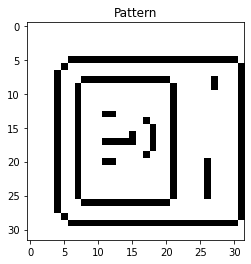

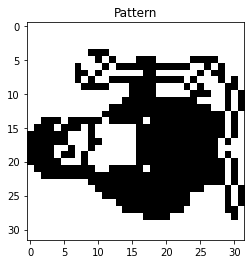

In [84]:
random_set1 = np.array([p1, p5, p8])

display_pattern(p1)
display_pattern(p5)
display_pattern(p8)

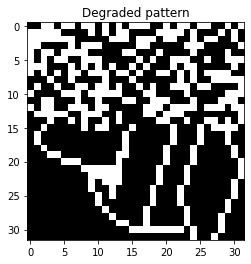

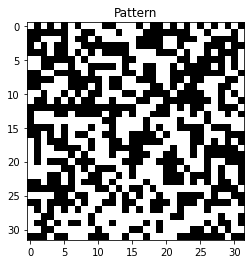

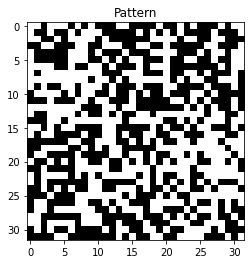

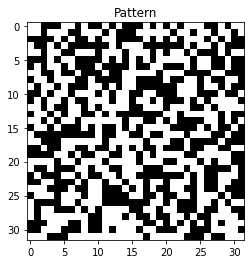

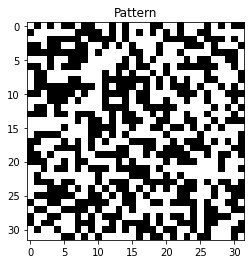

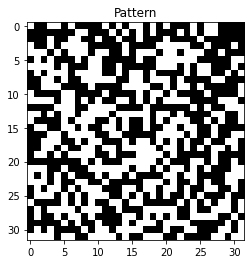

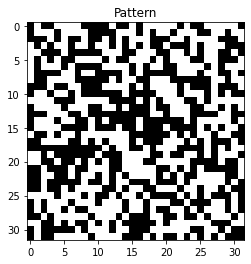

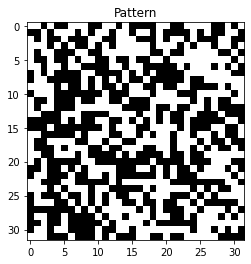

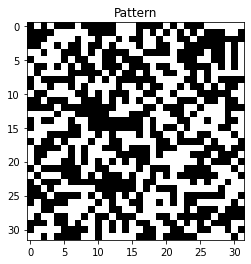

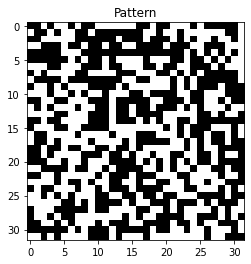

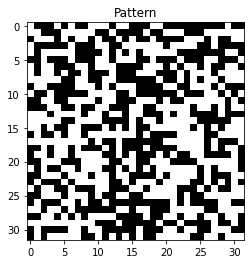

In [85]:
network0.fit(random_set1, random_set1)
network1.fit(random_set1, random_set1)
network2.fit(random_set1, random_set1)
network3.fit(random_set1, random_set1)
network4.fit(random_set1, random_set1)
network5.fit(random_set1, random_set1)
network6.fit(random_set1, random_set1)
network7.fit(random_set1, random_set1)
network8.fit(random_set1, random_set1)
network9.fit(random_set1, random_set1)

display_pattern(p10)

p10_result0 = network0.predict(p10.reshape((1,1024)))
display_pattern(p10_result0)

p10_result1 = network1.predict(p10.reshape((1,1024)))
display_pattern(p10_result1)

p10_result2 = network2.predict(p10.reshape((1,1024)))
display_pattern(p10_result2)

p10_result3 = network3.predict(p10.reshape((1,1024)))
display_pattern(p10_result3)

p10_result4 = network4.predict(p10.reshape((1,1024)))
display_pattern(p10_result4)

p10_result5 = network5.predict(p10.reshape((1,1024)))
display_pattern(p10_result5)

p10_result6 = network6.predict(p10.reshape((1,1024)))
display_pattern(p10_result6)

p10_result7 = network7.predict(p10.reshape((1,1024)))
display_pattern(p10_result7)

p10_result8 = network8.predict(p10.reshape((1,1024)))
display_pattern(p10_result8)

p10_result9 = network9.predict(p10.reshape((1,1024)))
display_pattern(p10_result9)

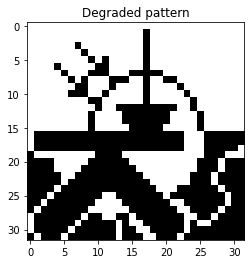

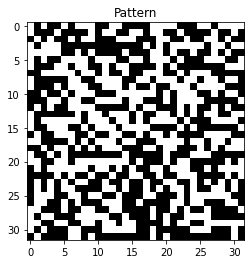

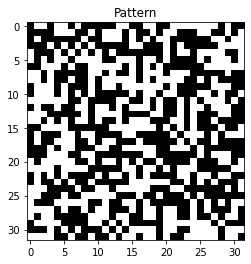

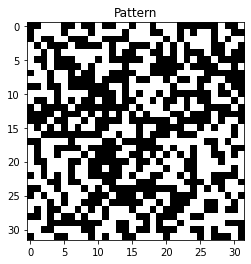

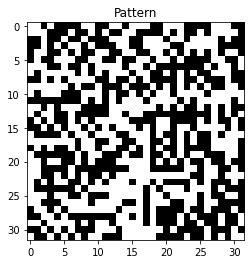

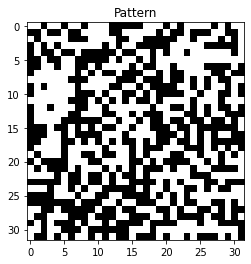

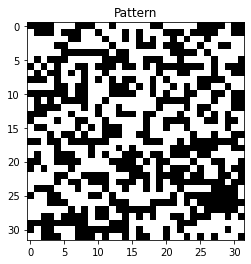

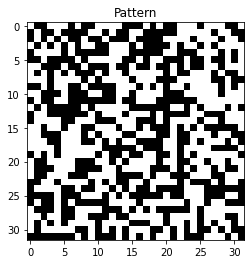

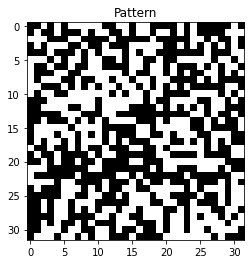

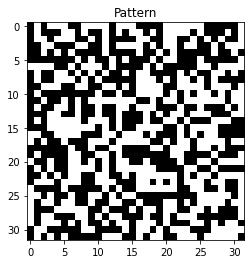

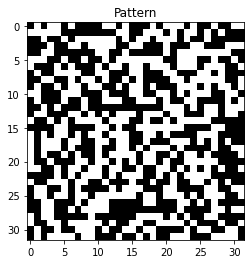

In [86]:
display_pattern(p11)

p11_result0 = network0.predict(p11.reshape((1,1024)))
display_pattern(p11_result0)

p11_result1 = network1.predict(p11.reshape((1,1024)))
display_pattern(p11_result1)

p11_result2 = network2.predict(p11.reshape((1,1024)))
display_pattern(p11_result2)

p11_result3 = network3.predict(p11.reshape((1,1024)))
display_pattern(p11_result3)

p11_result4 = network4.predict(p11.reshape((1,1024)))
display_pattern(p11_result4)

p11_result5 = network5.predict(p11.reshape((1,1024)))
display_pattern(p11_result5)

p11_result6 = network6.predict(p11.reshape((1,1024)))
display_pattern(p11_result6)

p11_result7 = network7.predict(p11.reshape((1,1024)))
display_pattern(p11_result7)

p11_result8 = network8.predict(p11.reshape((1,1024)))
display_pattern(p11_result8)

p11_result9 = network9.predict(p11.reshape((1,1024)))
display_pattern(p11_result9)

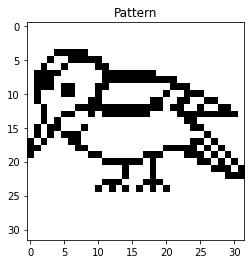

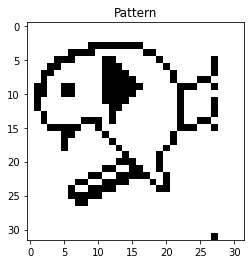

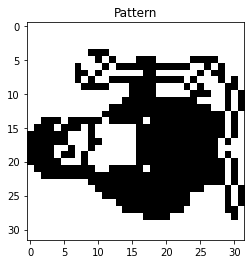

In [87]:
random_set2 = np.array([p6, p7, p8])

display_pattern(p6)
display_pattern(p7)
display_pattern(p8)

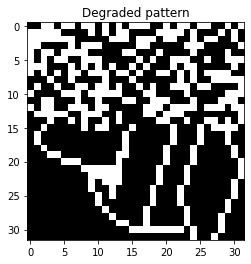

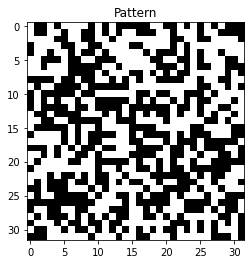

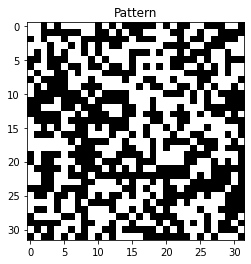

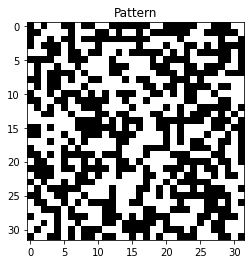

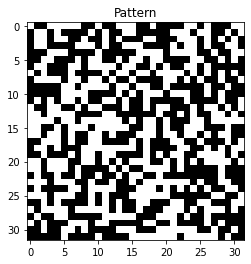

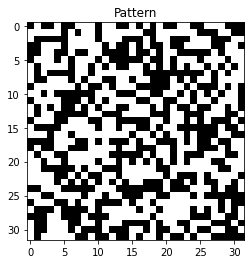

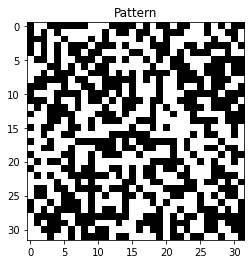

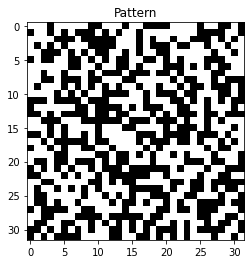

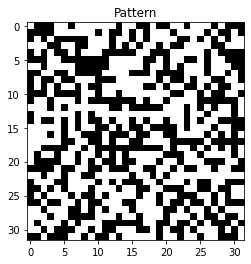

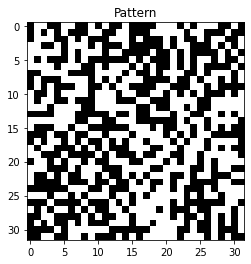

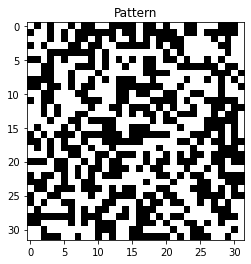

In [88]:
network0.fit(random_set2, random_set2)
network1.fit(random_set2, random_set2)
network2.fit(random_set2, random_set2)
network3.fit(random_set2, random_set2)
network4.fit(random_set2, random_set2)
network5.fit(random_set2, random_set2)
network6.fit(random_set2, random_set2)
network7.fit(random_set2, random_set2)
network8.fit(random_set2, random_set2)
network9.fit(random_set2, random_set2)

display_pattern(p10)

p10_result0 = network0.predict(p10.reshape((1,1024)))
display_pattern(p10_result0)

p10_result1 = network1.predict(p10.reshape((1,1024)))
display_pattern(p10_result1)

p10_result2 = network2.predict(p10.reshape((1,1024)))
display_pattern(p10_result2)

p10_result3 = network3.predict(p10.reshape((1,1024)))
display_pattern(p10_result3)

p10_result4 = network4.predict(p10.reshape((1,1024)))
display_pattern(p10_result4)

p10_result5 = network5.predict(p10.reshape((1,1024)))
display_pattern(p10_result5)

p10_result6 = network6.predict(p10.reshape((1,1024)))
display_pattern(p10_result6)

p10_result7 = network7.predict(p10.reshape((1,1024)))
display_pattern(p10_result7)

p10_result8 = network8.predict(p10.reshape((1,1024)))
display_pattern(p10_result8)

p10_result9 = network9.predict(p10.reshape((1,1024)))
display_pattern(p10_result9)

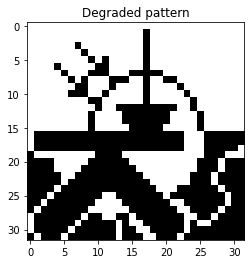

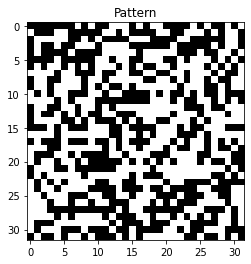

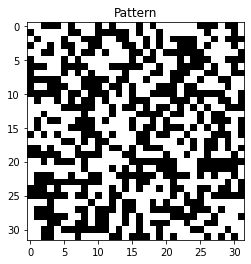

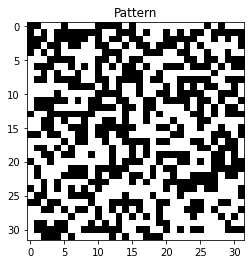

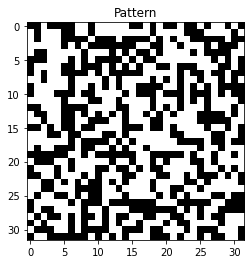

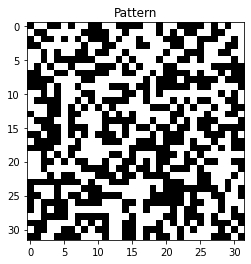

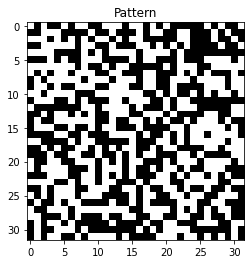

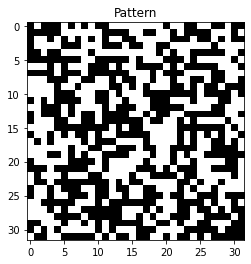

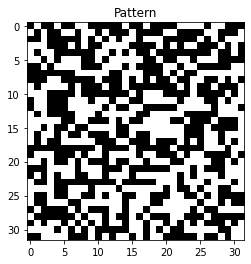

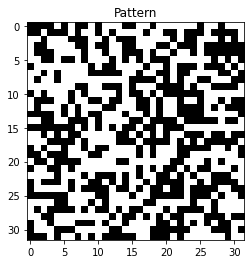

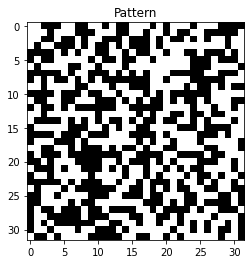

In [89]:
display_pattern(p11)

p11_result0 = network0.predict(p11.reshape((1,1024)))
display_pattern(p11_result0)

p11_result1 = network1.predict(p11.reshape((1,1024)))
display_pattern(p11_result1)

p11_result2 = network2.predict(p11.reshape((1,1024)))
display_pattern(p11_result2)

p11_result3 = network3.predict(p11.reshape((1,1024)))
display_pattern(p11_result3)

p11_result4 = network4.predict(p11.reshape((1,1024)))
display_pattern(p11_result4)

p11_result5 = network5.predict(p11.reshape((1,1024)))
display_pattern(p11_result5)

p11_result6 = network6.predict(p11.reshape((1,1024)))
display_pattern(p11_result6)

p11_result7 = network7.predict(p11.reshape((1,1024)))
display_pattern(p11_result7)

p11_result8 = network8.predict(p11.reshape((1,1024)))
display_pattern(p11_result8)

p11_result9 = network9.predict(p11.reshape((1,1024)))
display_pattern(p11_result9)

# 3.3 Energy

Can we be sure that the network converges, or will it cycle between different
states forever?
For networks with a symmetric connection matrix it is possible to define
an energy function or Lyapunov function, a finite-valued function of the state
that always decreases as the states change. Since it has to have a minimum at
least somewhere the dynamics must end up in an attractor.

In [123]:
fixed_points = np.array([p1, p2, p3, p4, p5, p6, p7, p8, p9])
testing_patterns=np.array([p10,p11])

network = HopfieldNetwork(max_iterations = 8, prediction_method = "sequential")

network.fit(training_patterns, training_patterns)

#### What is the energy at the different attractors?

In [125]:
for i in range(len(fixed_points)):
    x = fixed_points[i].reshape((1, 1024))
    
    network = HopfieldNetwork(max_iterations = 8, prediction_method = "sequential")
    network.fit(training_patterns, training_patterns)
    network.predict(x)
    energy = network.getEnergy()
    
    print("The energy at attractor p{} is {}.".format(i+1, energy[7][0][0]))

The energy at attractor p1 is -1439.390625.
The energy at attractor p2 is -1365.640625.
The energy at attractor p3 is -1462.25.
The energy at attractor p4 is -1596.01171875.
The energy at attractor p5 is -1596.01171875.
The energy at attractor p6 is -1596.01171875.
The energy at attractor p7 is -1596.01171875.
The energy at attractor p8 is -1596.01171875.
The energy at attractor p9 is -1596.01171875.


#### What is the energy at the points of the distorted patterns?

In [126]:
for i in range(len(testing_patterns)):
    x=testing_patterns[i].reshape((1, 1024))
    
    network = HopfieldNetwork(max_iterations = 8, prediction_method = "sequential")
    network.fit(training_patterns, training_patterns)
    network.predict(x)
    energy = network.getEnergy()
    
    print("The energy at distorded pattern p{} is {}.".format(i+10, energy[7][0][0]))

The energy at distorded pattern p10 is -1439.390625.
The energy at distorded pattern p11 is -1462.25.


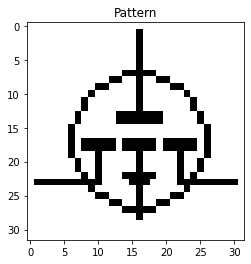

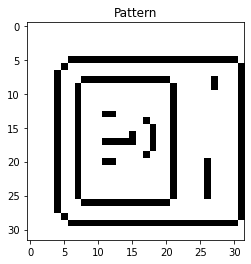

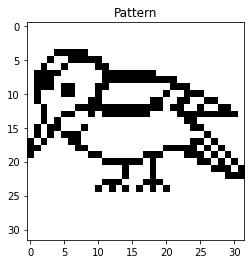

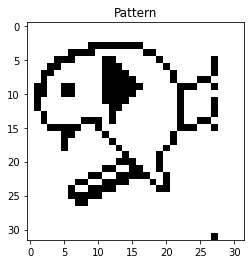

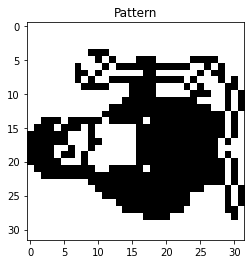

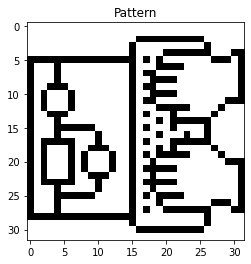

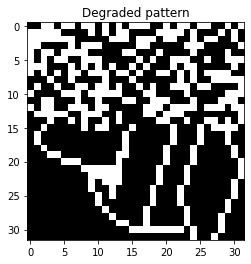

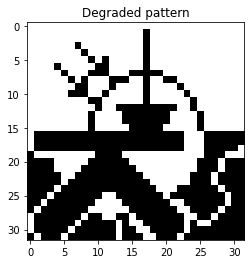

In [122]:
list = [p4, p5, p6, p7, p8, p9, p10, p11]
for i in list:
    display_pattern(i)

#### Follow how the energy changes from iteration to iteration when you use the sequential update rule to approach an attractor.

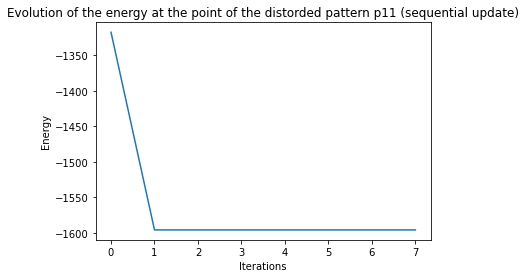

In [99]:
network = HopfieldNetwork(max_iterations = 8, prediction_method = "sequential")
network.fit(training_patterns, training_patterns)
network.predict(p11.reshape((1,1024)))
energy = network.getEnergy()
final_energy = []
for i in range(8):
    final_energy.append(energy[i][0][0])

plt.plot(range(8), final_energy)
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.title("Evolution of the energy at the point of the distorded pattern p11 (sequential update)")
plt.show()

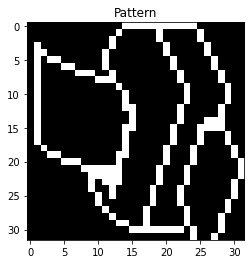

In [95]:
network = HopfieldNetwork(max_iterations = 8, prediction_method = "sequential")
network.fit(training_patterns, training_patterns)
result = network.predict(p10.reshape((1,1024)))
display_pattern(result)

In [96]:
def _get_energy(weights: np.array, prediction: np.array) -> np.array:
    energy = -prediction @ (weights @ prediction.T)
    return energy

#Creation of the weight matrix

def weight_matrix(patterns,scaling):
  n=len(patterns[0])
  P=len(patterns)
  W=np.zeros((n,n))
  for i in range (n):
    for j in range(n):
     #if j==i:
        #W[i,j]=0
        #continue
      somme=0
      for mu in range(P):
        x_mu=patterns[mu]
        somme = somme + x_mu[i]*x_mu[j]
      W[i,j]=somme
      if scaling==True:
        W[i,j]=W[i,j]/n # if scale is True, we scale with the number of units
  return W

In [97]:
print (_get_energy(weight_matrix(training_patterns, scaling = True), result))

[[-1439.390625]]


#### Generate a weight matrix by setting the weights to normally distributed random numbers, and try iterating an arbitrary starting state. What happens?

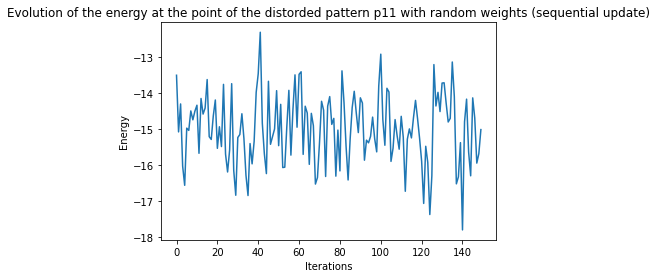

In [134]:
network = HopfieldNetwork(max_iterations = 150, prediction_method = "sequential", random_weights = True)
network.fit(training_patterns, training_patterns)
network.predict(p11.reshape((1,1024)))
energy = network.getEnergy()
final_energy = []
for i in range(150):
    final_energy.append(energy[i][0][0])

plt.plot(range(150), final_energy)
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.title("Evolution of the energy at the point of the distorded pattern p11 with random weights (sequential update)")
plt.show()

#### Make the weight matrix symmetric (e.g. by setting w=0.5*(w+w')). What happens now? Why?


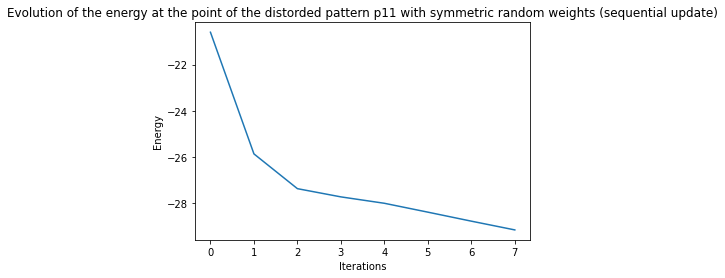

In [135]:
network = HopfieldNetwork(max_iterations = 8, prediction_method = "sequential", random_weights = True, symmetric_weights = True)
network.fit(training_patterns, training_patterns)
network.predict(p1.reshape((1,1024)))
energy = network.getEnergy()
final_energy = []
for i in range(8):
    final_energy.append(energy[i][0][0])

plt.plot(range(8), final_energy)
plt.xlabel("Iterations")
plt.ylabel("Energy")
plt.title("Evolution of the energy at the point of the distorded pattern p11 with symmetric random weights (sequential update)")
plt.show()